In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
from drift import Drift
from intervals import createDriftIntervals
ECG = pd.read_csv('/Users/akanksha/Desktop/DriftGen/driftgen/MBA_ECG805_data.out')
ECG1 = pd.read_csv('/Users/akanksha/Desktop/DriftGen/driftgen/MBA_ECG806_data.out')
max_length = 20000

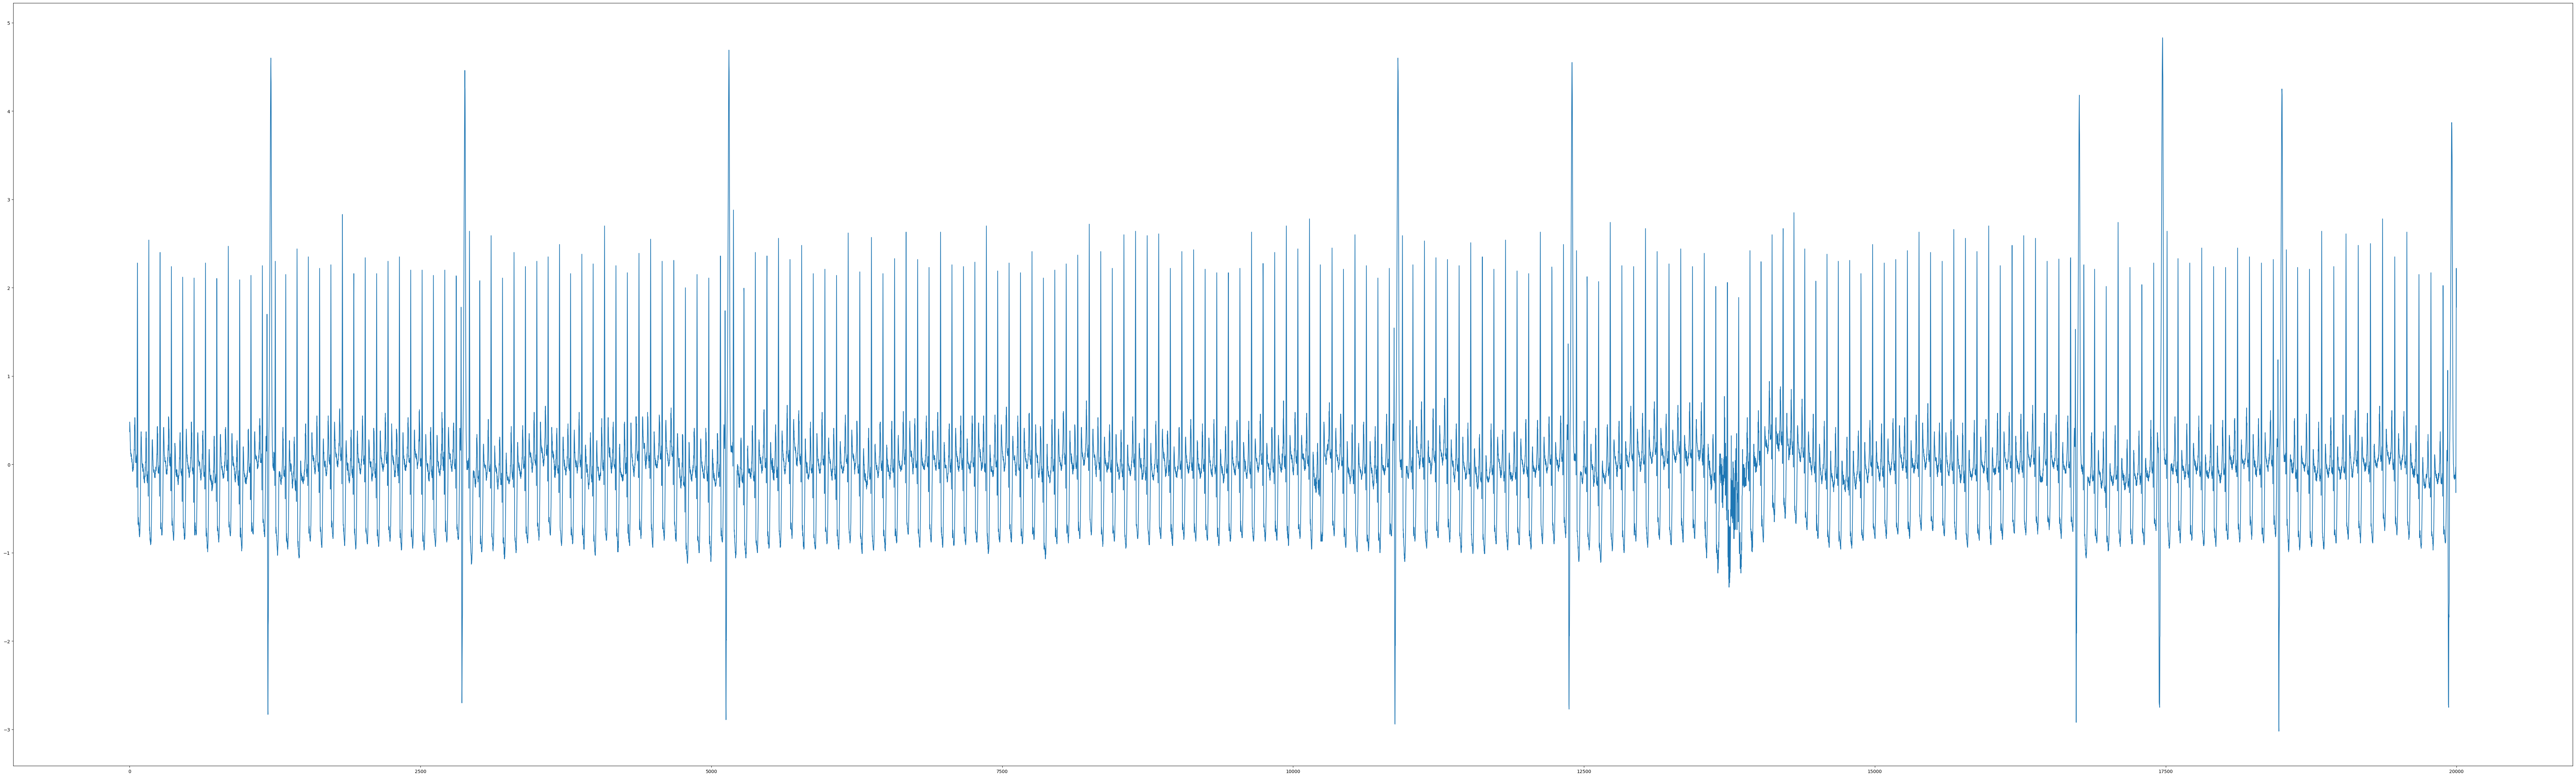

In [3]:
# plotting dataset 
drift_addition_1 = createDriftIntervals(ECG.iloc[0:max_length, :])

plt.figure(figsize=(100,30))
plt.plot(drift_addition_1.dataset.iloc[:,0])

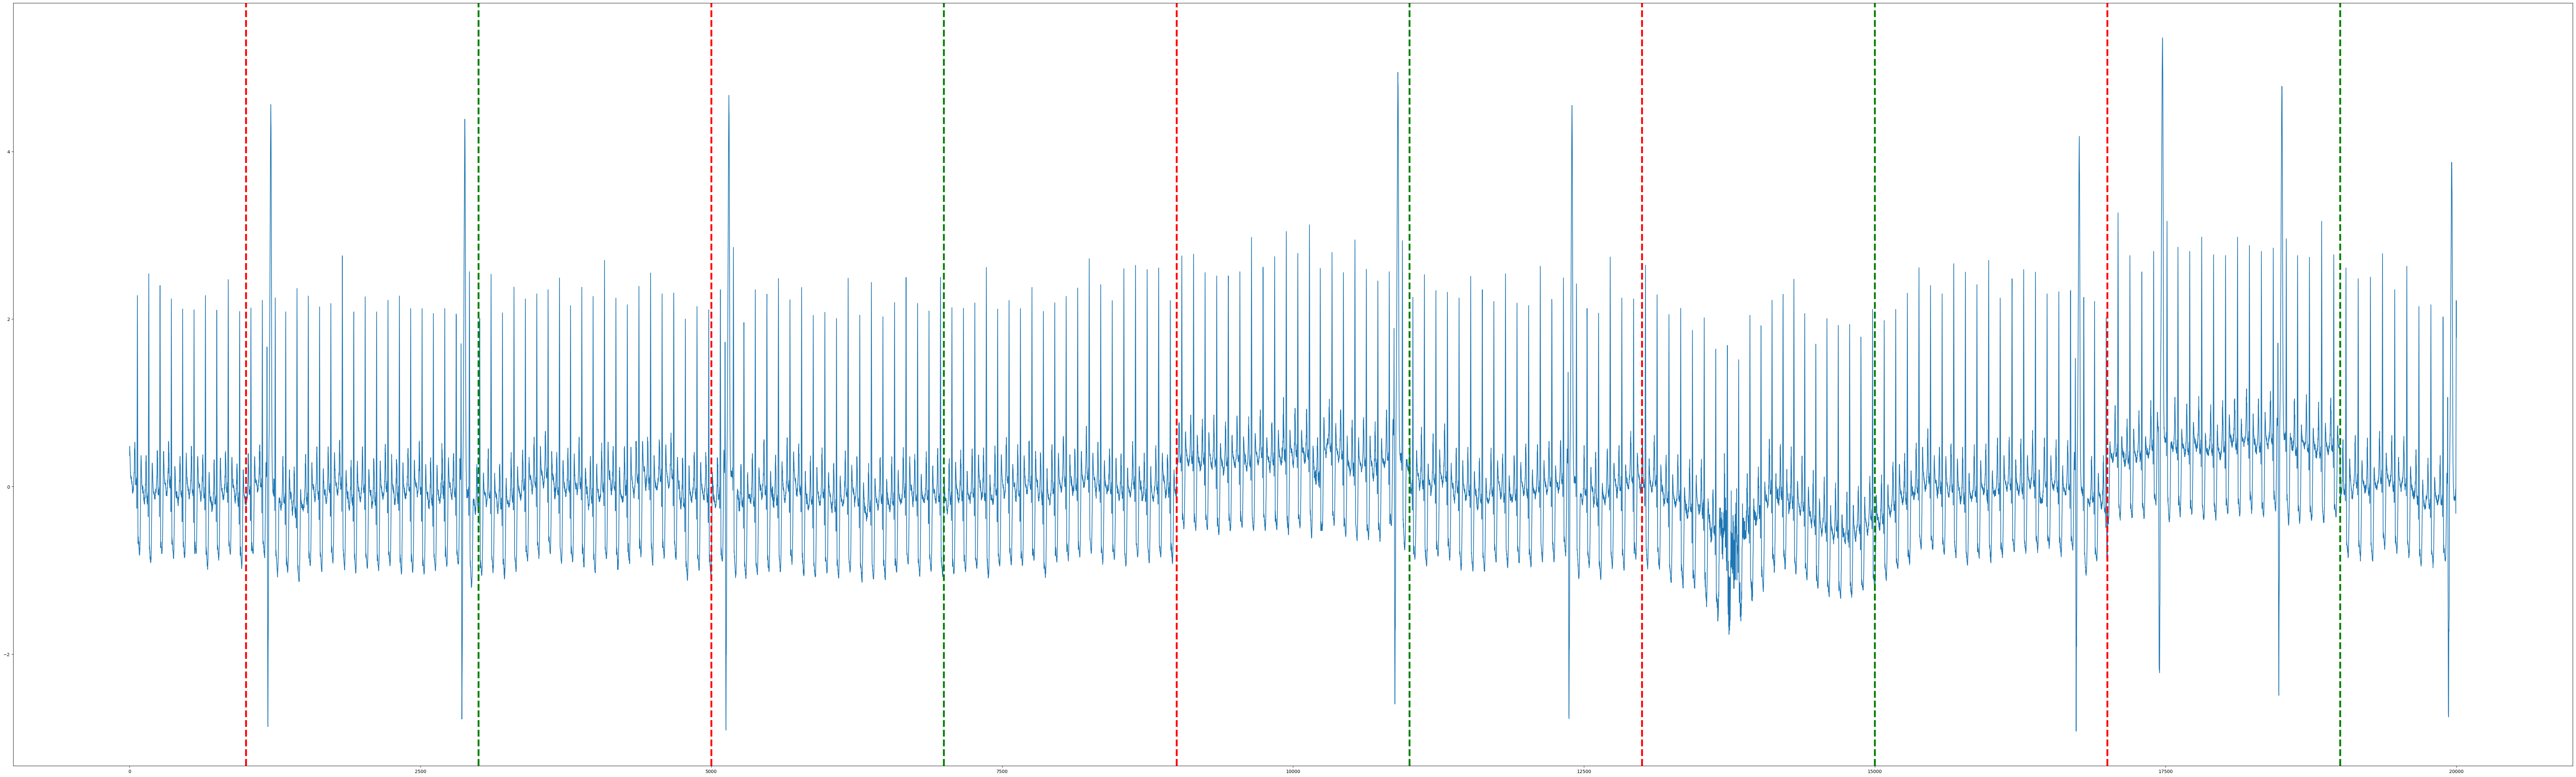

In [4]:
# creating 3 drift modules, one for each interval
meandrift1 = Drift('mean', 10, transition_period=0.2) # drift module 1
meandrift2 = Drift('mean', -13, transition_period=0) # drift module 3
meandrift3 = Drift('mean', 5, transition_period=0.5) # drift module 3

drift_addition_1.create_intervals(5,2000)
# add drift modules here corresponding to intervals
drift_addition_1.add_drifts(meandrift1, meandrift3, meandrift2, meandrift1, meandrift2) 

# plotting the dataset
drift_addition_1.plot_dataset()

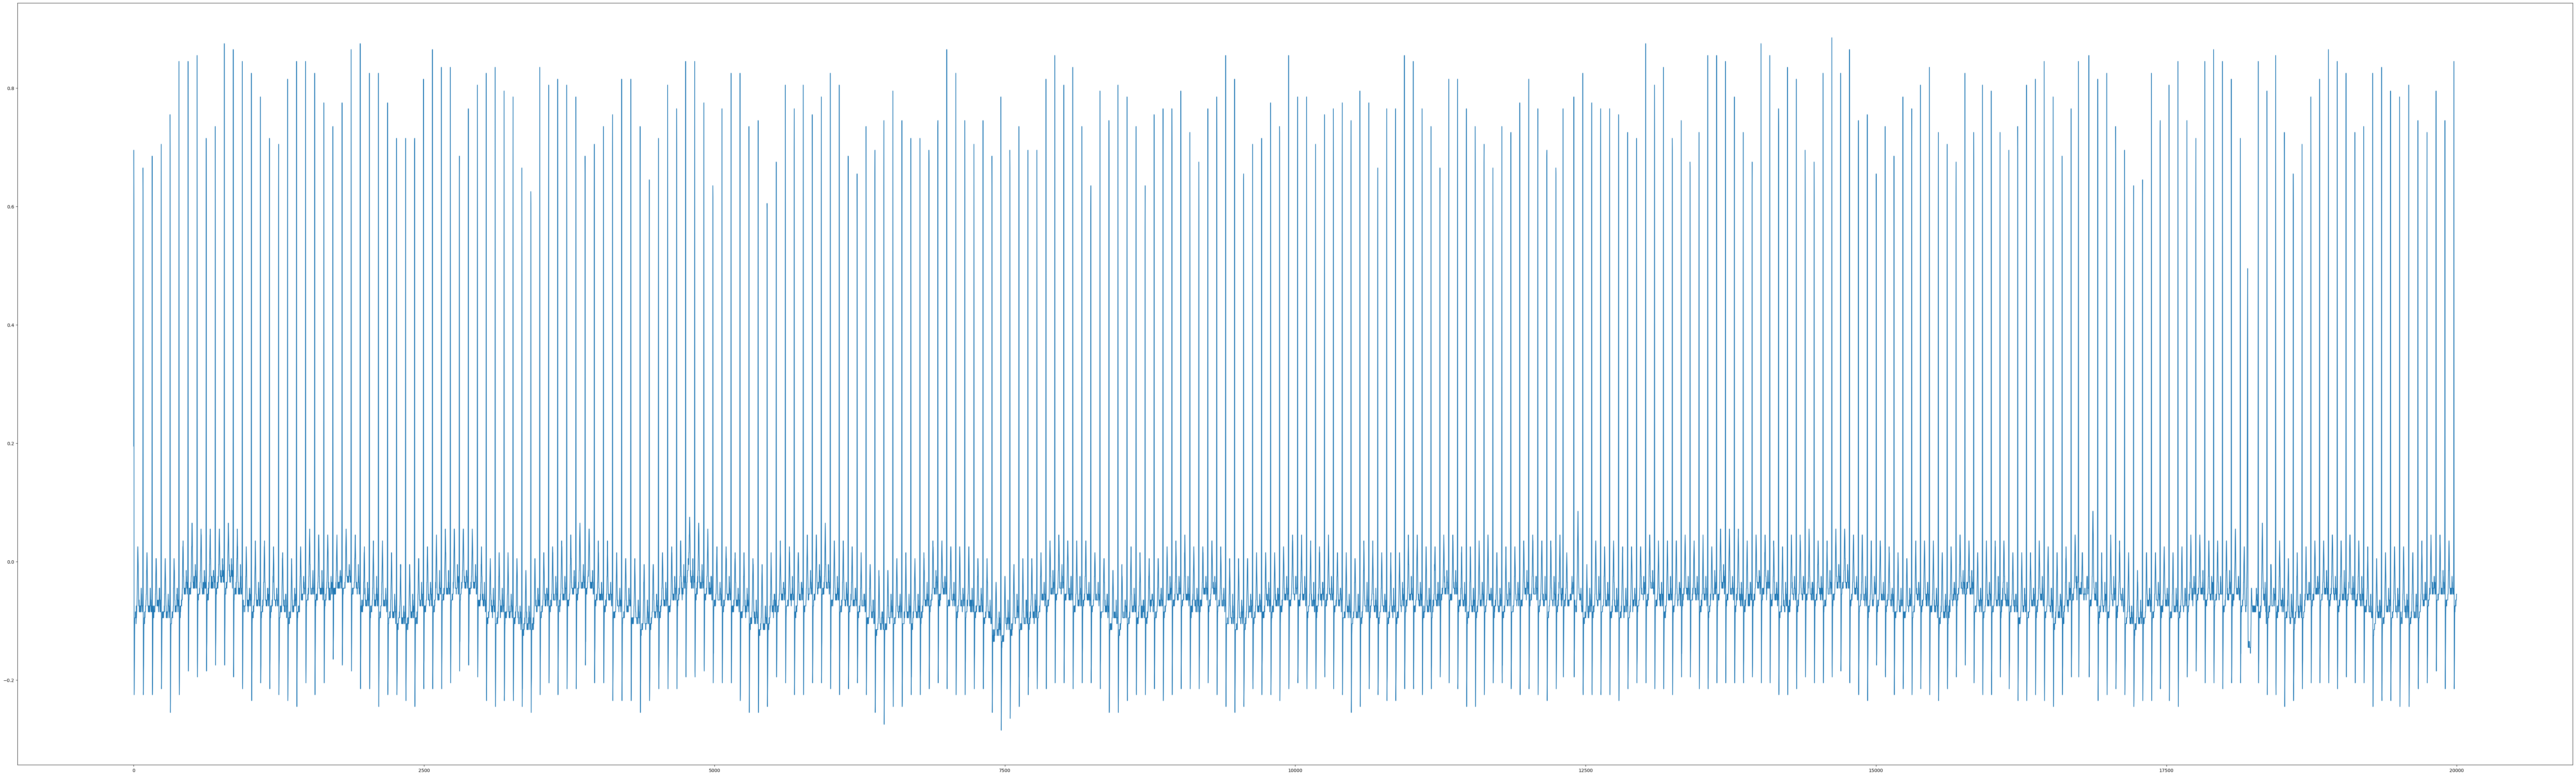

In [5]:
# plotting second dataset
from anomaly_intervals import *
from anomaly import *
anomaly_addition_1 = createAnomalyIntervals(ECG1.iloc[0:max_length, :])

plt.figure(figsize=(100,30))
plt.plot(anomaly_addition_1.dataset.iloc[:,0])

In [6]:
# creating point anomaly module with uniform distribution of values
pDistAnom1 = DistPointAnomaly(0.02, 'uniform', num_values=100, lowerbound=-2, upperbound=2) 
# creating point anomaly module with gaussian distribution of values
pDistAnom2 = DistPointAnomaly(0.003, distribution='gaussian', mu=0, std=0.5, num_values=20)
# creating point anomaly module with skew distribution of values
pDistAnom3 = DistPointAnomaly(0.01, 'skew', upperbound=2, skew=-2)

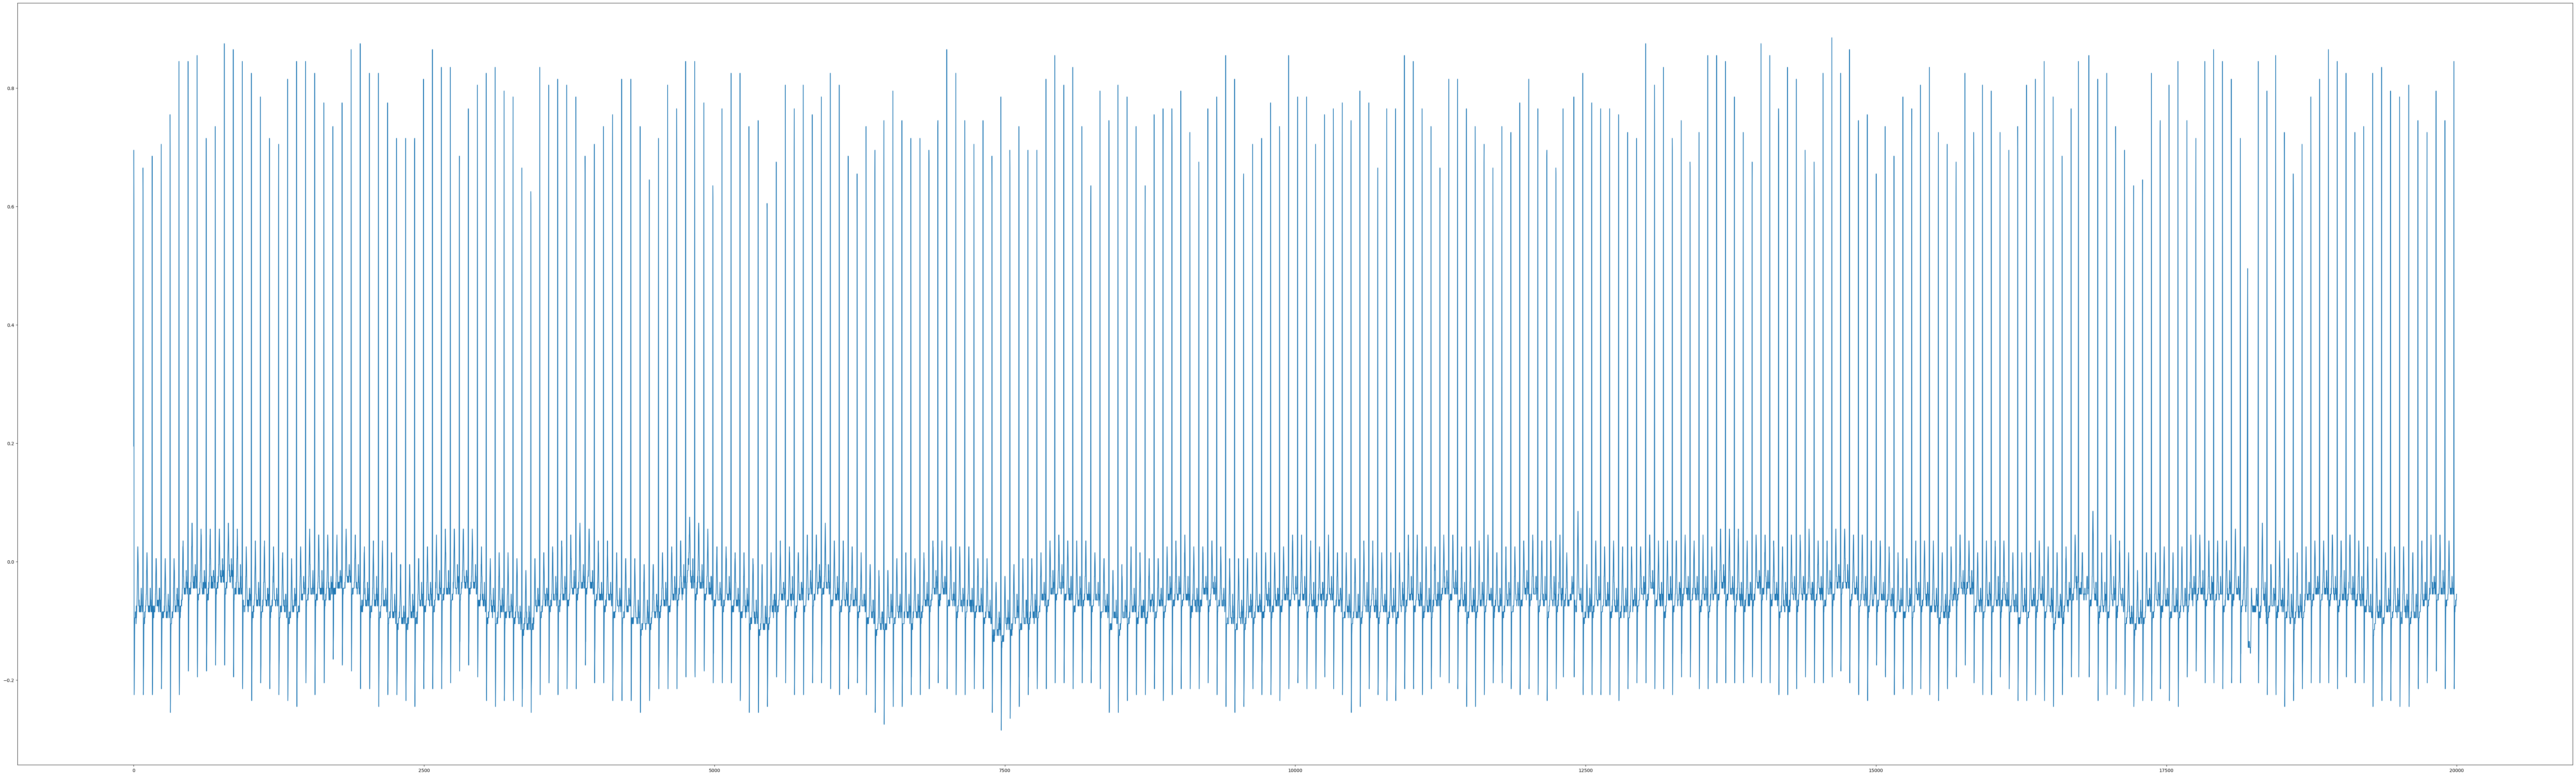

In [7]:
anomaly_addition_2 = createAnomalyIntervals(ECG1.iloc[0:max_length, :])

plt.figure(figsize=(100,30))
plt.plot(anomaly_addition_2.dataset.iloc[:,0])



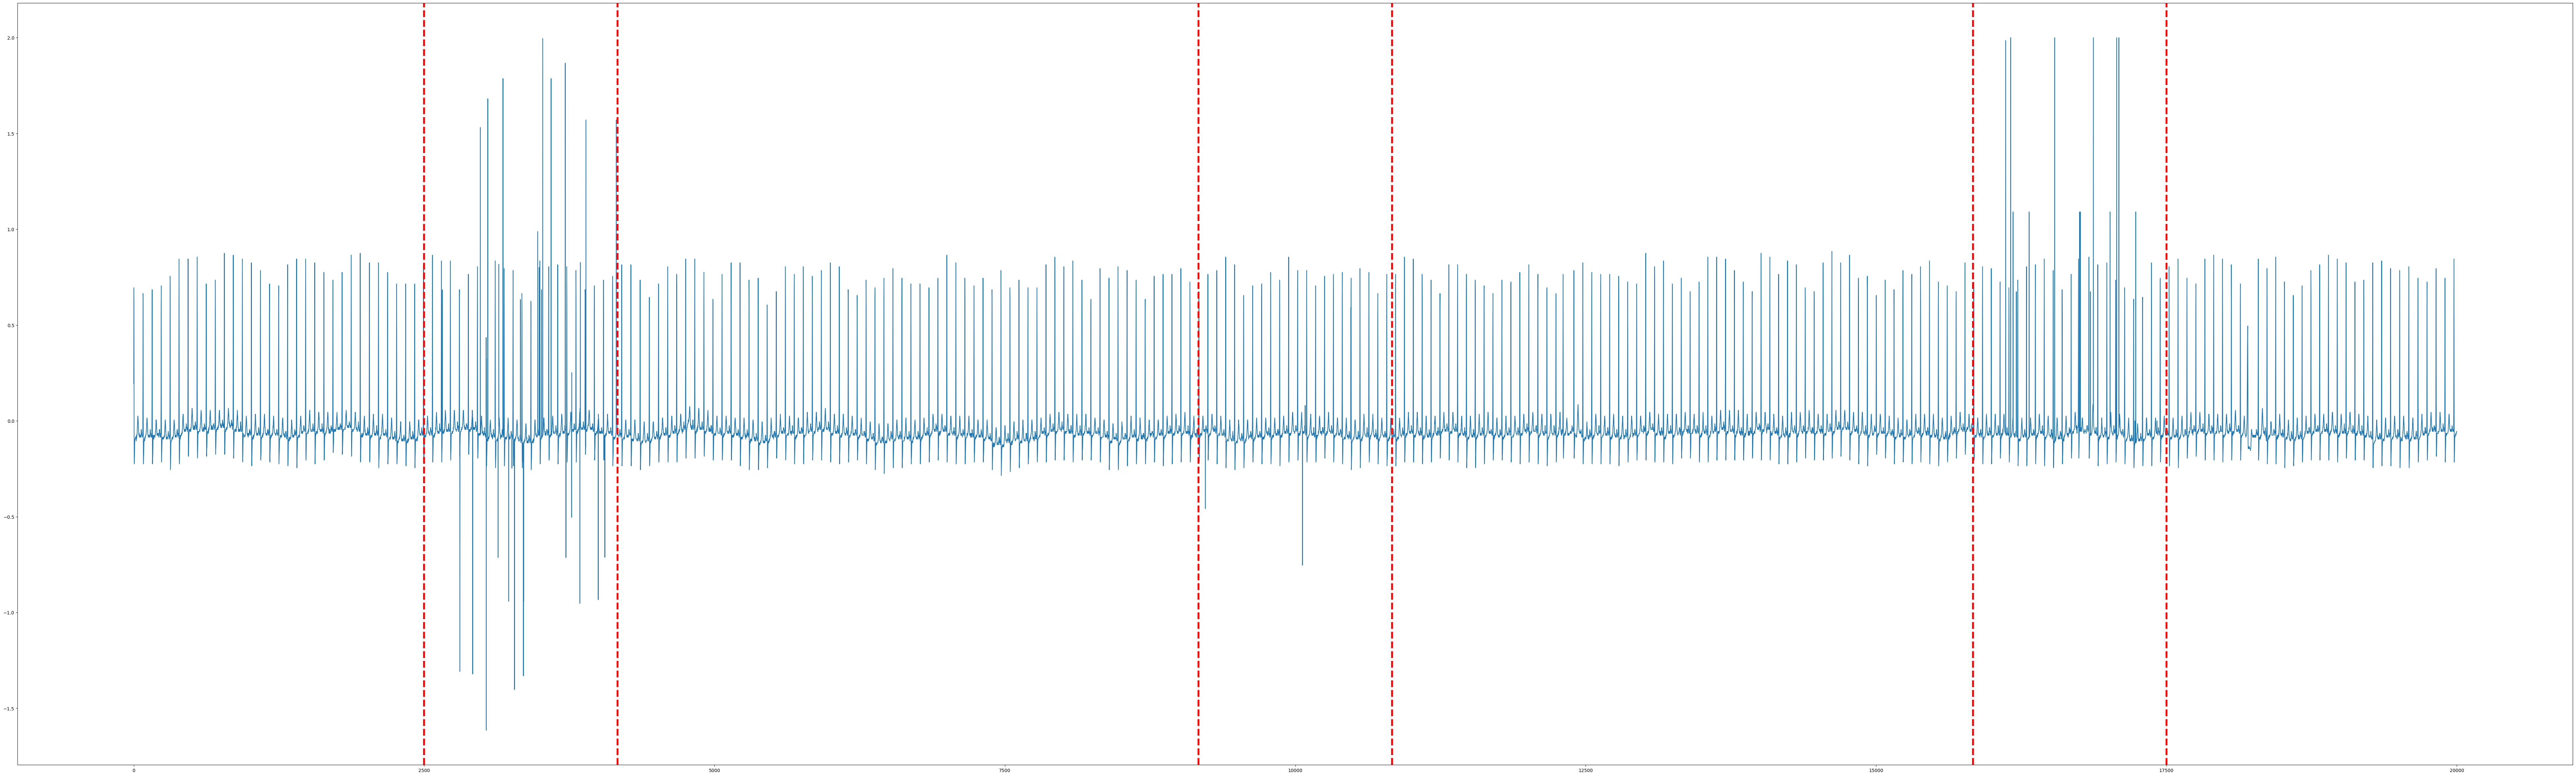

In [8]:
anomaly_addition_2.create_intervals(3,5000)
# add drift modules here corresponding to intervals
anomaly_addition_2.add_anomalies(pDistAnom1, pDistAnom2, pDistAnom3)

anomaly_addition_2.plot_dataset()

number of anomalies
6


TypeError: 'int' object is not iterable

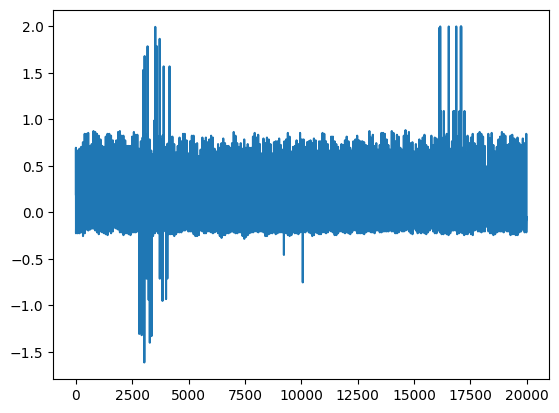

In [9]:
anomaly_addition_3 = createAnomalyIntervals(ECG1.iloc[0:max_length, :])

plt.plot(anomaly_addition_3.dataset.iloc[:,0])

# creating point anomaly module with uniform distribution of values
pCollAnom1 = CollectiveAnomaly(30, 0.1, upperbound=0.4, lowerbound=0, num_values=50)
# creating point anomaly module with gaussian distribution of values
pCollAnom2 = CollectiveAnomaly(10, 0.1, upperbound=0.4, lowerbound=0.1, num_values=200)
# creating point anomaly module with skew distribution of values
pCollAnom3 = CollectiveAnomaly(100, 0.05, num_values=50, upperbound=0.4, lowerbound=0)

anomaly_addition_3.create_intervals(3,5000)
# add drift modules here corresponding to intervals
anomaly_addition_3.add_anomalies(pCollAnom1, pCollAnom2, pCollAnom3)

#anomaly_addition_3.plot_dataset()